In [4]:
import geopandas as gpd
import pandas as pd

pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

# cities = gpd.read_feather(
#     "/Users/test/Documents/code/IL2/factory_loc_service/examples/closest_cities.feather"
# )
cities = gpd.read_parquet(
    "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/cities.parquet"
)

# uinput_industry = "oil_and_gas_ext"
# uinput_spec_num = {"Машинист": 200, "Оператор, аппаратчик": 300}
city_names = cities["region_city"].values

In [5]:
# print(uinput_industry, uinput_spec_num, city_names)

In [9]:
ontology = pd.read_pickle("../api/app/data/new_ontology.pkl")

grouped_grads = pd.read_pickle("../api/app/data/grouped_grads.pkl")

cv = pd.read_parquet("../api/app/data/cv.gzip").rename(
    columns={"hh_name": "speciality"}
)
YEAR = 2021
cv = cv[cv["year"] == YEAR]

In [10]:
grouped_grads

graduates_per_year_forecast  cv_count  city_capacity_grads_and_cv_sum
cluster_center                 region_city                    type edu_group_code speciality                                                                                  
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5              Геолог                                         NaN       2.0                             2.0
                                                                   11             Оператор, аппаратчик                           NaN       2.0                             2.0
                                                                                  Электромонтажник                               NaN       1.0                             1.0
                                                                   15             Инженер-проектировщик                          NaN       1.0                             1.0
                                                                                  Оператор, аппаратчик                           NaN       4.0                             4.0
...                                                                                                                              ...       ...                             ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18             NaN                                           59.0       NaN                            59.0
                                                                   19             NaN                                          309.0       NaN                           309.0
                                                                   21             NaN                                          120.0       NaN                           120.0
                                                                   22             NaN                                           41.0       NaN                            41.0
                                                                   33             NaN                                           10.0       NaN                            10.0

[110621 rows x 3 columns]

In [11]:
mask = grouped_grads.reset_index(drop=False).loc[:, "cluster_center"].isin(city_names)
grouped_grads = (
    grouped_grads.reset_index(drop=False)
    .loc[mask, :]
    .set_index(["cluster_center", "region_city", "type", "edu_group_code"])
)

# mask = cv["region_city"].isin(city_names)
# cv = cv[mask]

In [12]:
# ontology = pd.read_csv(
#     "/Users/test/Documents/code/IL2/industrial-location/api/app/data/ontology.csv",
#     index_col=0,
# )

# ontology.loc[ontology["industry_code"] == "mining_oil_gas", "industry_code"] = (
#     "oil_and_gas_ext"
# )
# ontology.loc[ontology["industry_code"] == "mmining_coal_ores", "industry_code"] = (
#     "coal_and_metal_ext"
# )
# ontology.loc[ontology["industry_code"] == "mech_engineering", "industry_code"] = (
#     "machinery"
# )
# ontology.loc[ontology["industry_code"] == "shipbuilding", "industry_code"] = (
#     "shipbuilding"
# )
# ontology.loc[ontology["industry_code"] == "aircraft_engineering", "industry_code"] = (
#     "aircraft_and_space"
# )
# ontology.loc[ontology["industry_code"] == "non_ferrous_metallurgy", "industry_code"] = (
#     "nonferrous_metallurgy"
# )
# ontology.loc[ontology["industry_code"] == "ferrous_metallurgy", "industry_code"] = (
#     "ferrous_metallurgy"
# )
# ontology.loc[ontology["industry_code"] == "chemical", "industry_code"] = "chemicals"
# ontology.loc[ontology["industry_code"] == "pharma", "industry_code"] = "pharmacy"
# ontology.loc[ontology["industry_code"] == "electronics", "industry_code"] = (
#     "electronics"
# )

In [13]:
# ontology["industry_code"].unique()

In [14]:
# ontology.to_pickle("new_ontology.pkl")

In [15]:
cv = cv.merge(ontology[["speciality", "edu_group_code"]], on="speciality")
cv["type"] = "CV"
grouped_cv = (
    cv.groupby(
        ["cluster_center", "region_city", "type", "edu_group_code", "speciality"]
    )["id_cv"]
    .count()
    .to_frame()
).rename(columns={"id_cv": "cv_count"})
cv.head(3)

,id_cv,speciality,year,region_city,cluster_center,edu_group_code,type
0,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15,CV
1,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15,CV
2,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15,CV


In [16]:
grouped_cv

cv_count
cluster_center                 region_city                    type edu_group_code speciality                     
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5              Геолог                        2
                                                                   11             Оператор, аппаратчик          2
                                                                                  Электромонтажник              1
                                                                   15             Инженер-проектировщик         1
                                                                                  Оператор, аппаратчик          4
...                                                                                                           ...
Ярославская область, Ярославль Ярославская область, Ярославль CV   26             Технолог                      3
                                                                   27             Инженер по качеству          48
                                                                   33             Исследователь                19
                                                                                  Оператор, аппаратчик         37
                                                                                  Технолог                      3

[106678 rows x 1 columns]

In [17]:
ontology["speciality"].unique()

array(['Оператор, аппаратчик', 'Монтажник', 'Машинист',
       'Мастер по ремонту оборудования', 'Разнорабочий', 'Слесарь',
       'Геодезист', 'Геолог', 'Технолог', 'Инженер-эколог',
       'Инженер-конструктор', 'Сварщик', 'Наладчик',
       'Токарь, фрезеровщик, шлифовщик', 'Контролер ОТК',
       'Инженер-проектировщик', 'Специалист по сертификации',
       'Инженер по качеству', 'Механик', 'Инженер по эксплуатации',
       'Лаборант', 'Исследователь', 'Электромонтажник'], dtype=object)

In [18]:
# grads = pd.read_csv(
#     "/Users/test/Documents/code/IL2/factory_loc_service/examples/graduates.csv"
# )

# grads.dropna(subset="edu_group", inplace=True)
# grouped_grads = (
#     grads.groupby(["cluster_center", "region_city", "type", "edu_group_code"])[
#         "graduates_per_year_forecast"
#     ]
#     .sum()
#     .to_frame()
# )
# grouped_grads = grouped_grads.join(grouped_cv, how="outer")
# grouped_grads["city_capacity_grads_and_cv_sum"] = grouped_grads[
#     "graduates_per_year_forecast"
# ].fillna(0) + grouped_grads["cv_count"].fillna(0)
# grouped_grads.to_pickle("grouped_grads.pkl")

In [19]:
grouped_grads

speciality  graduates_per_year_forecast  cv_count  city_capacity_grads_and_cv_sum
cluster_center                 region_city                    type edu_group_code                                                                                              
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5                              Геолог                          NaN       2.0                             2.0
                                                                   11               Оператор, аппаратчик                          NaN       2.0                             2.0
                                                                   11                   Электромонтажник                          NaN       1.0                             1.0
                                                                   15              Инженер-проектировщик                          NaN       1.0                             1.0
                                                                   15               Оператор, аппаратчик                          NaN       4.0                             4.0
...                                                                                                  ...                          ...       ...                             ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18                                NaN                         59.0       NaN                            59.0
                                                                   19                                NaN                        309.0       NaN                           309.0
                                                                   21                                NaN                        120.0       NaN                           120.0
                                                                   22                                NaN                         41.0       NaN                            41.0
                                                                   33                                NaN                         10.0       NaN                            10.0

[110436 rows x 4 columns]

In [20]:
# --- START ---
"""
Эта штука завязана на входных профессиях и индустрии,
поэтому нужно каждый раз пересчитывать -- мб можно оптимизировать и пересчитывать только часть
но имхо оно и так быстро
"""

uinput_spec_num_2 = dict()
competitor_industries = list()
competitor_fatories = list()


for k in uinput_spec_num.keys():
    uinput_spec_num_2[k] = (
        ontology.loc[ontology["speciality"] == k, "edu_group_id"]
        .drop_duplicates()
        .values.tolist()
    )
    competitor_industries += (
        ontology.loc[ontology["speciality"] == k, "industry_code"]
        .drop_duplicates()
        .tolist()
    )
# --- START ---

competitor_industries = set(competitor_industries)
competitor_industries.remove(uinput_industry)


grad_col = []
fact_col = []

for col in cities.columns:
    if "factor" in col and uinput_industry in col:
        fact_col.append(col)

    if "factor" in col and any(industry in col for industry in competitor_industries):
        competitor_fatories.append(col)

    if "grad" in col and uinput_industry in col:
        grad_col.append(col)

cities["competitors_factories_num"] = cities[competitor_fatories].sum(axis=1)

print(competitor_industries)
print(grad_col, fact_col, competitor_fatories)

NameError: name 'uinput_spec_num' is not defined

In [ ]:
grouped_grads

graduates_per_year_forecast  id_cv  city_capacity_grads_and_cv_sum
cluster_center                 region_city                    type edu_group_code                                                                    
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5                                       NaN    2.0                             2.0
                                                                   11                                      NaN    3.0                             3.0
                                                                   15                                      NaN   21.0                            21.0
                                                                   18                                      NaN   12.0                            12.0
                                                                   19                                      NaN    2.0                             2.0
...                                                                                                        ...    ...                             ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18                                     59.0    NaN                            59.0
                                                                   19                                    309.0    NaN                           309.0
                                                                   21                                    120.0    NaN                           120.0
                                                                   22                                     41.0    NaN                            41.0
                                                                   33                                     10.0    NaN                            10.0

[68217 rows x 3 columns]

In [ ]:
grouped_grads = (
    grouped_grads.reset_index(drop=False)
    .groupby(["cluster_center", "type"])[["city_capacity_grads_and_cv_sum", "count"]]
    .sum()
    .join(
        cities[
            ["region_city", "population", "num_in_migration"]
            + grad_col
            + fact_col
            + ["factories_total"]
            + ["competitors_factories_num"]
        ]
        .rename(columns={"region_city": "cluster_center"})
        .set_index("cluster_center"),
        how="left",
    )
)

grouped_grads[
    [
        "num_in_migration",
        "graduates_oil_and_gas_ext",
        "factories_oil_and_gas_ext",
        "factories_total",
        "city_capacity_grads_and_cv_sum",
        "population",
        "competitors_factories_num",
    ]
] = (
    grouped_grads[
        [
            "num_in_migration",
            "graduates_oil_and_gas_ext",
            "factories_oil_and_gas_ext",
            "factories_total",
            "city_capacity_grads_and_cv_sum",
            "population",
            "competitors_factories_num",
        ]
    ]
    .round(0)
    .fillna(0)
    .astype(int)
)

grouped_grads["working_population"] = (
    (grouped_grads["population"] * 0.65).round(0).astype(int)
)

In [ ]:
"""
(!) Сейчас есть всё кроме непосредственной оценки (!)
А ну и задаваемое кол-во специалистов пока не учитывается
Но это следствие из отсутствия реализации расчета оценки

Эту таблицу практически в таком виде и планирую отдавать

Из того что обсуждали с СА:
условно выпускников взвесить по кол-ву предприятий тк их число ту мач большое
"""

'\n(!) Сейчас есть всё кроме непосредственной оценки (!)\nА ну и задаваемое кол-во специалистов пока не учитывается\nНо это следствие из отсутствия реализации расчета оценки\n\nЭту таблицу практически в таком виде и планирую отдавать\n\nИз того что обсуждали с СА:\nусловно выпускников взвесить по кол-ву предприятий тк их число ту мач большое\n'

In [ ]:
grouped_grads

city_capacity_grads_and_cv_sum   id_cv  population  num_in_migration  graduates_oil_and_gas_ext  factories_oil_and_gas_ext  factories_total  competitors_factories_num  working_population
cluster_center                 type                                                                                                                                                                                            
Адыгея, Адыгейск               CV                               118   118.0       13191                 4                          0                          0                0                          0                8574
Адыгея, Майкоп                 CV                               260   260.0      139687                20                        554                          0                6                          5               90797
                               ВПО                             1993     0.0      139687                20                        554                          0                6                          5               90797
                               СПО                              660     0.0      139687                20                        554                          0                6                          5               90797
Алтай, Горно-Алтайск           CV                               508   508.0       64957                 7                        468                          0                1                          1               42222
...                                                             ...     ...         ...               ...                        ...                        ...              ...                        ...                 ...
Ярославская область, Углич     CV                               226   226.0       32228                 4                          0                          0                5                          5               20948
                               СПО                               40     0.0       32228                 4                          0                          0                5                          5               20948
Ярославская область, Ярославль CV                              2134  2134.0      570824               443                        559                          0               65                         65              371036
                               ВПО                             5723     0.0      570824               443                        559                          0               65                         65              371036
                               СПО                             1307     0.0      570824               443                        559                          0               65                         65              371036

[2111 rows x 9 columns]

In [ ]:
""" ------------------------- FINISH HERE -------------------------------- """

' ------------------------- FINISH HERE -------------------------------- '

In [ ]:
import pandas as pd

gg = pd.read_pickle(
    "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/grouped_grads.pkl"
)

In [ ]:
gg

graduates_per_year_forecast  \
cluster_center                 region_city                    type edu_group_code speciality                                           
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5              Геолог                                         NaN   
                                                                   11             Оператор, аппаратчик                           NaN   
                                                                                  Электромонтажник                               NaN   
                                                                   15             Инженер-проектировщик                          NaN   
                                                                                  Оператор, аппаратчик                           NaN   
...                                                                                                                              ...   
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18             NaN                                           59.0   
                                                                   19             NaN                                          309.0   
                                                                   21             NaN                                          120.0   
                                                                   22             NaN                                           41.0   
                                                                   33             NaN                                           10.0   

                                                                                                         cv_count  \
cluster_center                 region_city                    type edu_group_code speciality                        
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5              Геолог                      2.0   
                                                                   11             Оператор, аппаратчик        2.0   
                                                                                  Электромонтажник            1.0   
                                                                   15             Инженер-проектировщик       1.0   
                                                                                  Оператор, аппаратчик        4.0   
...                                                                                                           ...   
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18             NaN                         NaN   
                                                                   19             NaN                         NaN   
                                                                   21             NaN                         NaN   
                                                                   22             NaN                         NaN   
                                                                   33             NaN                         NaN   

                                                                                                         city_capacity_grads_and_cv_sum  
cluster_center                 region_city                    type edu_group_code speciality                                             
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5              Геолог                                            2.0  
                                                                   11             Оператор, аппаратчик                              2.0  
                                                                                  Электромонтажник                                  1.0  
                                                                   15             Инженер-проектировщик                     

In [29]:
from api.app.methods.workflows import WorkForceFlows
from fastapi import APIRouter, HTTPException, status
from pydantic import BaseModel
from typing import Dict, Optional
import os
import pickle
import geopandas as gpd
import json

# wff = WorkForceFlows.from_pickle(
#     "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/wff_0712.pkl"
# )
filename = "wff_0712.pkl"
directory = "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/"


# Check if the file exists in the specified directory

if filename in os.listdir(directory):

    filepath = os.path.join(directory, "scaler_wff.pkl")
    with open(filepath, "rb") as f:
        scaler_x = pickle.load(f)

    filepath = os.path.join(directory, "gravity_wff.pkl")
    with open(filepath, "rb") as f:
        model_gravity = pickle.load(f)

    filepath = os.path.join(directory, "cities.parquet")
    cities = gpd.read_parquet(filepath)

    filepath = os.path.join(directory, filename)
    wff = WorkForceFlows.from_pickle(filepath)
    # wff['cities'] = cities
    wff["scaler"] = scaler_x
    wff["model"] = model_gravity

Class instance loaded from /Users/test/Documents/code/IL2/factory_loc_service/api/app/data/wff_0712.pkl


<Axes: >

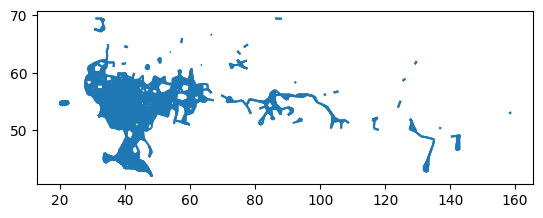

In [30]:
wff.gdf_links.plot()

In [31]:
city_name = "Краснодарский край, Абинск"

In [32]:
updated_params = {
    "ueqi_residential": 90.0,
    "ueqi_street_networks": 52.0,
    "ueqi_green_spaces": 99.0,
    "ueqi_public_and_business_infrastructure": 91.0,
    "ueqi_social_and_leisure_infrastructure": 97.0,
    "ueqi_citywide_space": 97.0,
}

In [18]:
diff

,region_city,geometry,in_out_diff,in_diff,out_diff
0,"Хакасия, Абаза",POINT (90.09757 52.64711),0.0,0.0,0.0
1,"Хакасия, Абакан",POINT (91.45000 53.74000),0.0,0.0,0.0
2,"Оренбургская область, Абдулино",POINT (53.64000 53.68000),0.0,0.0,-1.0
3,"Краснодарский край, Абинск",POINT (38.15000 44.86000),0.0,0.0,0.0
4,"Башкортостан, Агидель",POINT (53.92000 55.90000),0.0,0.0,0.0
...,...,...,...,...,...
1101,"Кировская область, Омутнинск",POINT (52.18000 58.68000),0.0,0.0,0.0
1102,"Челябинская область, Нязепетровск",POINT (59.59545 56.05392),0.0,0.0,-3.0
1103,"Тульская область, Чекалин",POINT (36.24722 54.09853),0.0,-2.0,0.0
1104,"Псковская область, Новоржев",POINT (29.33000 57.03000),0.0,0.0,0.0


In [33]:
wff.update_city_params(city_name, updated_params)
wff.recalculate_after_update()

# Generate differences
diff = wff.compare_city_states()
diff_links = wff.compare_link_states()

# Apply masks and save GeoJSONs
mask = diff["in_out_diff"] != -10
cities_diff = diff.clip(area)[mask].dropna()

mask_links = diff_links["big_flows"] > 0
links_diff = wff.gdf_links[
    wff.gdf_links["destination"].isin(diff_links[mask_links]["destination"])
]

Updated parameters for Краснодарский край, Абинск
Recalculating after updating parameters
stage 4 done
stage 5 done


100%|██████████| 1106/1106 [00:00<00:00, 2044.25it/s]


stage 6 done
stage 7 done
stage 8 done
Recalculation complete.


/opt/homebrew/anaconda3/envs/for_mob/lib/python3.10/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


In [38]:
links_diff

,origin,destination,flow,geometry,destination_attr,population,origin_attr,distance,big_flows,scaled_flows_forvis
50474,"Краснодарский край, Новокубанск","Краснодарский край, Кореновск",0.002007,"LINESTRING (41.01700 45.11600, 39.45000 45.46000)",5.0,41391.0,5.0,182732.447651,116,0.048
55823,"Краснодарский край, Курганинск","Краснодарский край, Апшеронск",0.002047,"LINESTRING (40.60000 44.91000, 39.73000 44.45500)",5.0,39577.0,5.0,120225.972756,116,0.048
56866,"Краснодарский край, Гулькевичи","Краснодарский край, Белореченск",0.002053,"LINESTRING (40.71000 45.37000, 39.86000 44.79000)",5.0,55010.0,5.0,131583.283745,116,0.048
57778,"Ставропольский край, Новоалександровск","Краснодарский край, Хадыженск",0.002057,"LINESTRING (41.22000 45.49000, 39.53000 44.45000)",5.0,21829.0,5.0,249346.088573,116,0.048
57984,"Ростовская область, Зерноград","Краснодарский край, Тимашевск",0.002059,"LINESTRING (40.30800 46.84000, 38.94000 45.63000)",5.0,51397.0,5.0,247216.096336,116,0.048
...,...,...,...,...,...,...,...,...,...,...
1217466,"Краснодарский край, Геленджик","Краснодарский край, Абинск",0.447679,"LINESTRING (38.07900 44.56300, 38.15000 44.86000)",14.0,38866.0,7.0,47189.653583,195,0.053
1219046,"Краснодарский край, Туапсе","Краснодарский край, Абинск",0.633355,"LINESTRING (39.10000 44.12000, 38.15000 44.86000)",14.0,38866.0,8.0,156584.573519,238,0.055
1219375,"Краснодарский край, Новороссийск","Краснодарский край, Абинск",0.661706,"LINESTRING (37.77000 44.71000, 38.15000 44.86000)",14.0,38866.0,8.0,48403.485406,245,0.055
1219462,"Краснодарский край, Абинск","Краснодарский край, Краснодар",0.684121,"LINESTRING (38.15000 44.86000, 38.91000 45.03000)",10.0,1121291.0,14.0,88727.246841,251,0.055


In [34]:
cities_diff

,region_city,geometry,in_out_diff,in_diff,out_diff
879,"Краснодарский край, Туапсе",POINT (39.10000 44.12000),-82.0,36.0,118.0
923,"Краснодарский край, Хадыженск",POINT (39.53000 44.45000),-22.0,4.0,26.0
32,"Краснодарский край, Апшеронск",POINT (39.73014 44.45489),-22.0,4.0,26.0
197,"Краснодарский край, Горячий Ключ",POINT (39.17778 44.64588),-38.0,10.0,48.0
82,"Краснодарский край, Белореченск",POINT (39.86000 44.79000),-21.0,4.0,25.0
6,"Адыгея, Адыгейск",POINT (39.19000 44.88000),-39.0,10.0,49.0
418,"Краснодарский край, Краснодар",POINT (38.91000 45.03000),-162.0,117.0,279.0
910,"Краснодарский край, Усть-Лабинск",POINT (39.68359 45.21545),-39.0,11.0,50.0
399,"Краснодарский край, Кореновск",POINT (39.45000 45.46000),-22.0,4.0,26.0
863,"Краснодарский край, Тимашевск",POINT (38.94000 45.63000),-21.0,4.0,25.0


In [35]:
area = (
    wff.initial_cities_state.loc[
        wff.initial_cities_state["region_city"] == city_name, "geometry"
    ]
    .to_frame()
    .to_crs(3857)
    .buffer(200 * 1e3)
    .to_crs(4326)
    .to_frame()
)

In [ ]:
original_cities = wff.cities.to_crs(4326).overlay(area)

original_flows_mask = wff.gdf_links["destination"].isin(original_cities["region_city"])

original_flows = wff.gdf_links[original_flows_mask]

In [36]:
original_cities

,population,factories_total,median_salary,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,harsh_climate,region_city,migrations_from_each_city,norm_outflow,city_attractiveness_coeff,flows_in,flows_out,geometry
0,38866.0,2.0,20900.0,30.0,29.0,20.0,23.0,22.0,39.0,0.0,"Краснодарский край, Абинск",8.437380,0.327927,6.0,2234.0,2242.0,POINT (38.15000 44.86000)
1,13191.0,0.0,20000.0,49.0,33.0,24.0,24.0,27.0,33.0,0.0,"Адыгея, Адыгейск",6.275355,0.082778,6.0,3170.0,3179.0,POINT (39.19000 44.88000)
2,82695.0,1.0,17600.0,43.0,39.0,38.0,37.0,31.0,34.0,0.0,"Краснодарский край, Анапа",29.428368,2.433579,7.0,1901.0,1908.0,POINT (37.30000 44.89000)
3,39577.0,0.0,13700.0,37.0,25.0,17.0,23.0,21.0,38.0,0.0,"Краснодарский край, Апшеронск",4.812109,0.190449,5.0,2917.0,2927.0,POINT (39.73014 44.45489)
4,55010.0,3.0,16000.0,36.0,26.0,32.0,26.0,25.0,31.0,0.0,"Краснодарский край, Белореченск",27.930375,1.536450,5.0,3268.0,3279.0,POINT (39.86000 44.79000)
5,80296.0,2.0,21570.0,39.0,34.0,37.0,37.0,41.0,32.0,0.0,"Краснодарский край, Геленджик",35.258606,2.831125,7.0,2254.0,2263.0,POINT (38.07909 44.56300)
6,41482.0,1.0,15750.0,43.0,32.0,31.0,35.0,25.0,24.0,0.0,"Краснодарский край, Горячий Ключ",6.896789,0.286093,6.0,3054.0,3063.0,POINT (39.17778 44.64588)
7,41391.0,2.0,18390.0,32.0,23.0,21.0,17.0,23.0,37.0,0.0,"Краснодарский край, Кореновск",6.293347,0.260488,5.0,3148.0,3155.0,POINT (39.45000 45.46000)
8,1121291.0,67.0,24449.0,43.0,36.0,40.0,31.0,35.0,40.0,0.0,"Краснодарский край, Краснодар",304.388462,341.308043,10.0,3163.0,3023.0,POINT (38.91000 45.03000)
9,54420.0,0.0,19000.0,34.0,28.0,20.0,25.0,22.0,41.0,0.0,"Краснодарский край, Крымск",43.311994,2.357039,6.0,2233.0,2242.0,POINT (37.99000 44.93000)


<Axes: >

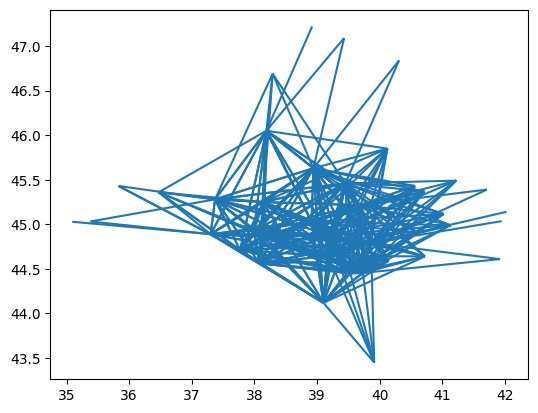

In [37]:
original_flows.plot()

In [51]:
import geopandas as gpd

p = "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/cities.parquet"
c = gpd.read_file(
    "/Users/test/Documents/code/IL2/factory_loc_service/examples/cities.geojson"
)

In [52]:
c

,region_city,city_category,population,harsh_climate,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,...,probability_to_move,probability_to_move_to_SELECTED_CITY,migrations_to_selected_city,num_in_migration,one_vacancy_out_response,estimate,h3_index,x,y,geometry
0,"Хакасия, Абаза",Малый город,12055,False,172,36,34,27,16,20,...,0.889793,0.002423,0.029192,0.390940,74.180,0.512,862535cc7ffffff,90.097573,52.647106,POINT (90.09757 52.64711)
1,"Хакасия, Абакан",Большой город,185348,False,210,36,37,24,37,36,...,0.413735,0.020500,0.774521,17.594633,18.926,0.687,8625263b7ffffff,91.450000,53.740000,POINT (91.45000 53.74000)
2,"Оренбургская область, Абдулино",Малый город,16987,False,157,34,23,12,23,20,...,0.815783,0.002863,0.029192,0.771992,123.058,0.577,8610887a7ffffff,53.640000,53.680000,POINT (53.64000 53.68000)
3,"Краснодарский край, Абинск",Малый город,38866,False,163,30,29,20,23,22,...,0.120468,0.005763,0.029191,7.420949,11.589,0.473,862d72a87ffffff,38.150000,44.860000,POINT (38.15000 44.86000)
4,"Башкортостан, Агидель",Малый город,14002,False,203,35,49,27,25,29,...,0.562235,0.006304,0.029192,4.039961,3.218,0.378,8610f2d4fffffff,53.920000,55.900000,POINT (53.92000 55.90000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,"Кировская область, Омутнинск",Малый город,19371,False,151,26,33,22,19,20,...,0.832541,0.003149,0.029191,0.771969,33.680,0.481,86101ba8fffffff,52.180000,58.680000,POINT (52.18000 58.68000)
1102,"Челябинская область, Нязепетровск",Малый город,10198,False,166,23,30,25,23,27,...,0.780881,0.007844,0.029191,2.516103,4.769,0.441,8610d18efffffff,59.595449,56.053924,POINT (59.59545 56.05392)
1103,"Тульская область, Чекалин",Малый город,904,False,178,22,31,33,17,29,...,0.483614,0.005673,0.029192,4.288906,0.233,0.143,8611808b7ffffff,36.247219,54.098526,POINT (36.24722 54.09853)
1104,"Псковская область, Новоржев",Малый город,3195,False,174,18,31,28,30,28,...,0.735636,0.001139,0.084913,0.440973,4.535,0.175,861f6d017ffffff,29.330000,57.030000,POINT (29.33000 57.03000)


In [56]:
c.loc[
    :,
    [
        "region_city",
        "city_category",
        "migrations_from_each_city",
        "population",
        "harsh_climate",
        "ueqi_residential",
        "ueqi_street_networks",
        "ueqi_green_spaces",
        "ueqi_public_and_business_infrastructure",
        "ueqi_social_and_leisure_infrastructure",
        "ueqi_citywide_space",
        "factories_total",
        "h3_index",
        "median_salary",
        "num_in_migration",
        "estimate",
        "geometry",
    ],
].to_parquet(p)